<a href="https://colab.research.google.com/github/imad10902/British-Airways-Customer-Behaviour-ML/blob/master/British_Airways_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder

In [137]:
df= pd.read_csv('data/customer_booking.csv', encoding='latin-1')
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [138]:
df['sales_channel']= (df['sales_channel']=='Internet').astype(int)
enc = OneHotEncoder(sparse=False)
encoded_columns = enc.fit_transform(df[['booking_origin', 'trip_type', 'flight_day', 'route']])
df_encoded = pd.DataFrame(encoded_columns, columns=enc.get_feature_names_out(['booking_origin', 'trip_type', 'flight_day', 'route']))
df = pd.concat([df.drop(columns=['booking_origin', 'trip_type', 'flight_day', 'route']), df_encoded], axis=1)
df = df.reindex(columns=[col for col in df.columns if col != 'booking_complete'] + ['booking_complete'])
df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_origin_(not set),...,route_TPETRZ,route_TPETWU,route_TPEURT,route_TPEVTE,route_TRZWUH,route_TRZXIY,route_TWUWUH,route_TWUXIY,route_URTXIY,booking_complete
0,2,1,262,19,7,1,0,0,5.52,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,1,112,20,3,0,0,0,5.52,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,1,243,22,17,1,1,0,5.52,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1,1,96,31,4,0,0,1,5.52,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2,1,68,22,15,1,0,1,5.52,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,27,6,9,1,0,1,5.62,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
49996,1,1,111,6,4,0,0,0,5.62,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
49997,1,1,24,6,22,0,0,1,5.62,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
49998,1,1,15,6,11,1,0,1,5.62,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [139]:
df['booking_complete'].unique()

array([0, 1])

In [140]:
value_counts = df['booking_complete'].value_counts()

In [141]:
value_counts

0    42522
1     7478
Name: booking_complete, dtype: int64

In [14]:
list= df.columns.tolist()
list

['num_passengers',
 'sales_channel',
 'trip_type',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_day',
 'route',
 'booking_origin',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration',
 'booking_complete']

Now plotting for each parameter, how much prob of getting 1 for each value in that coloumn(for a paramter or a feature, which value is giving most 1s(booking confirms))

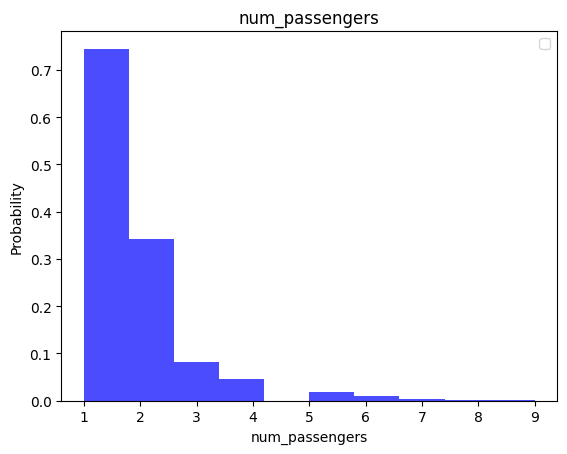

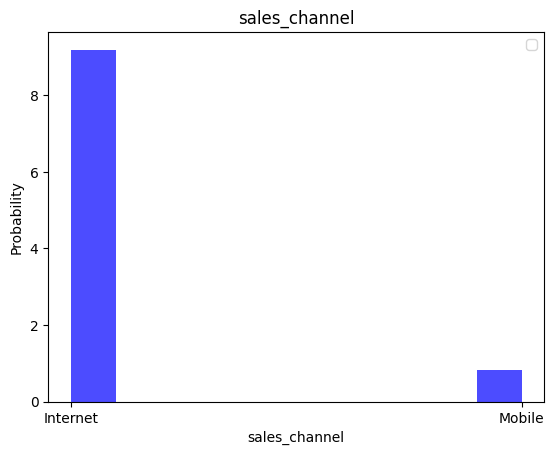

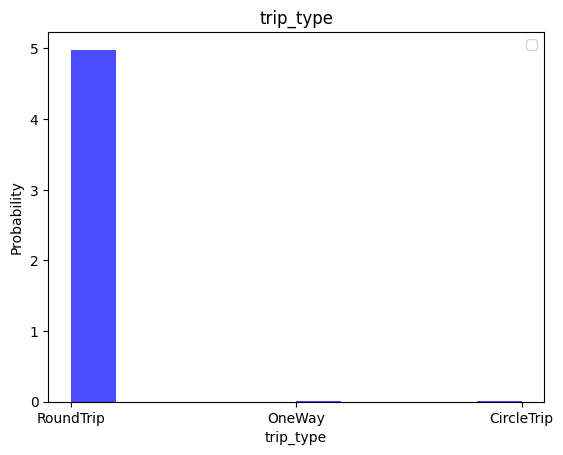

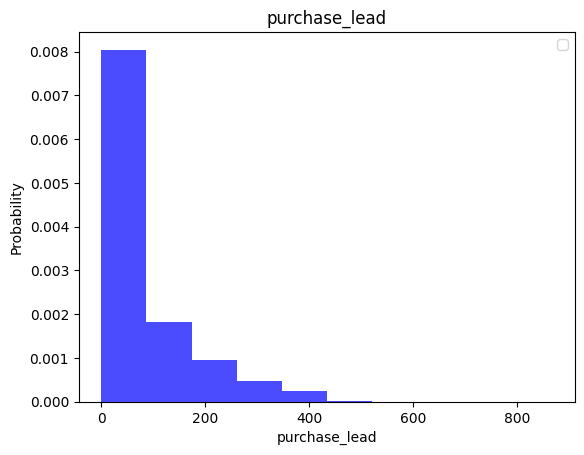

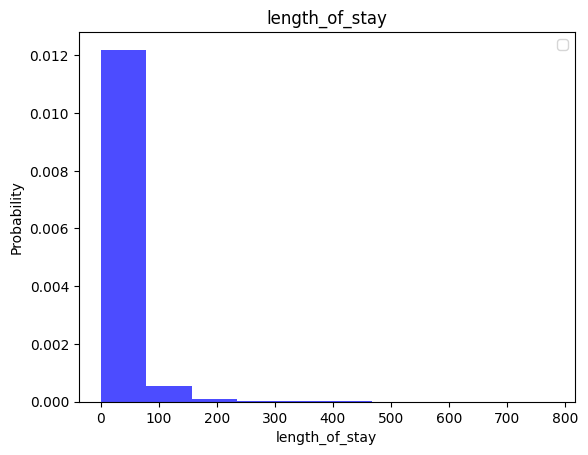

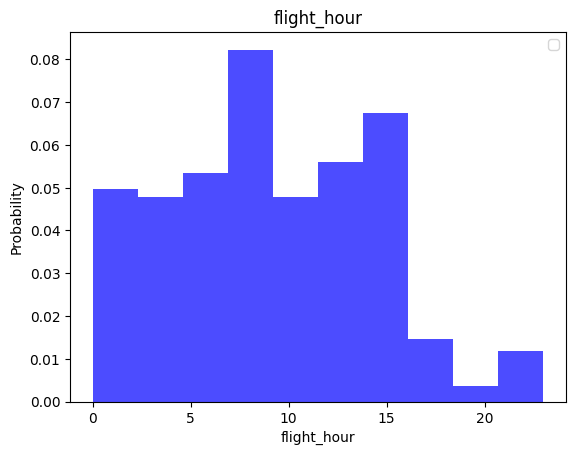

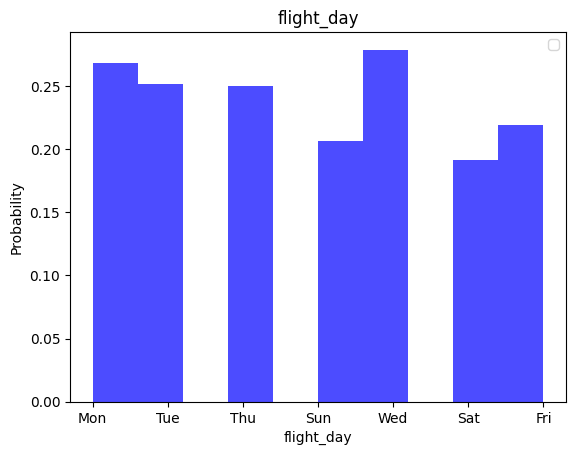

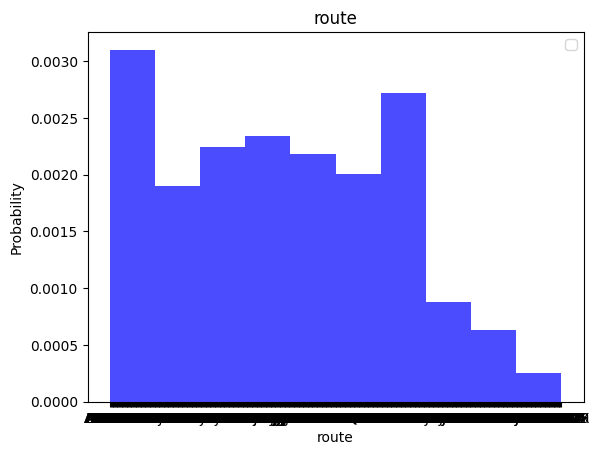

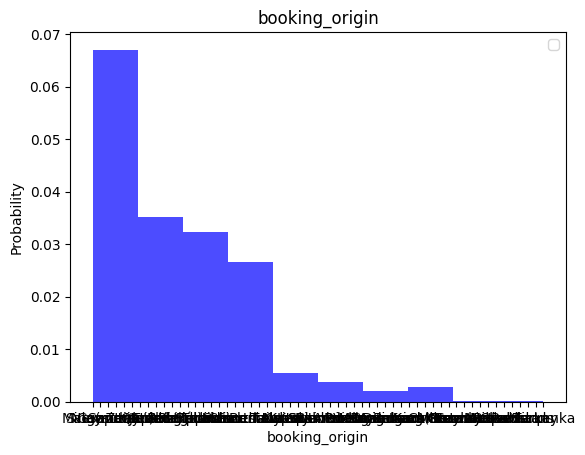

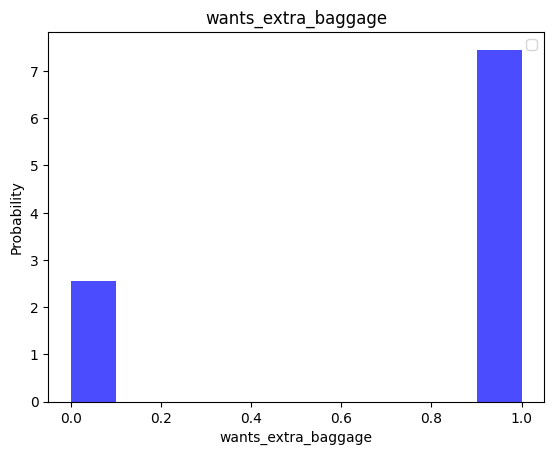

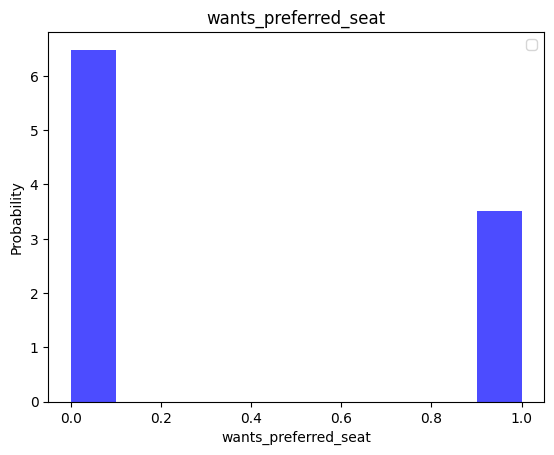

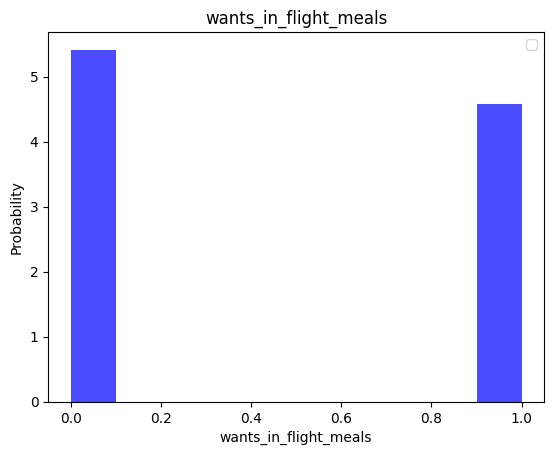

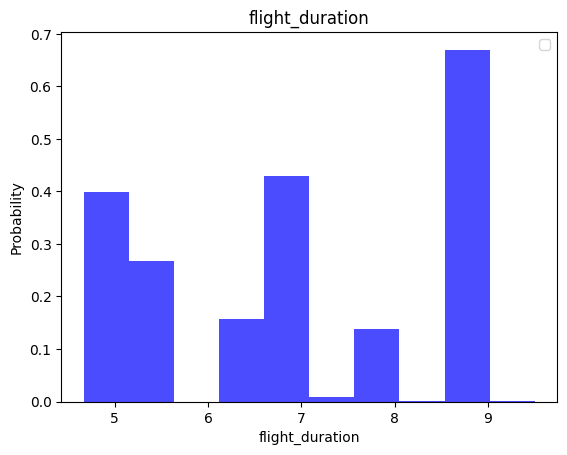

In [18]:
for label in list[:-1]:
  plt.hist(df[df['booking_complete']==1][label], color='blue', alpha= 0.7, density= True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

Now splitting datasets for training, validation and testing

In [142]:
train, valid, test= np.split(df.sample(frac=1),[int(0.8*len(df)), int(0.9*len(df))])

In [143]:
df.sample(frac=1)

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_origin_(not set),...,route_TPETRZ,route_TPETWU,route_TPEURT,route_TPEVTE,route_TRZWUH,route_TRZXIY,route_TWUWUH,route_TWUXIY,route_URTXIY,booking_complete
9376,2,1,24,106,22,1,1,0,8.83,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
45356,3,1,173,6,9,1,1,0,7.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
21050,1,1,29,29,23,1,1,1,8.83,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2874,1,1,283,22,8,1,1,0,8.58,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
42403,3,1,257,6,13,0,0,1,8.83,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42968,1,1,29,6,11,1,1,1,4.67,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9082,4,1,81,30,23,1,0,1,8.83,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
45830,3,1,8,6,12,1,1,1,8.58,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
18934,1,1,19,71,11,0,1,0,8.83,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [144]:
train

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_origin_(not set),...,route_TPETRZ,route_TPETWU,route_TPEURT,route_TPEVTE,route_TRZWUH,route_TRZXIY,route_TWUWUH,route_TWUXIY,route_URTXIY,booking_complete
36763,3,1,6,5,4,0,0,0,6.62,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10129,5,1,48,19,5,1,0,1,8.58,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7087,3,1,5,22,2,1,1,1,8.58,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
41472,3,1,359,5,5,1,0,0,4.67,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
30918,1,0,11,4,11,0,0,1,8.83,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44963,2,1,212,6,18,1,0,0,8.58,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10843,1,1,11,23,1,1,0,0,8.83,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
26194,1,0,5,2,9,0,0,0,7.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
35941,1,1,16,5,3,1,0,1,4.67,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [145]:
value_counts= train['booking_complete'].value_counts()

In [146]:
value_counts

0    34007
1     5993
Name: booking_complete, dtype: int64

Now to create a 2d numpy array of input sets, an array of outputs and a hstack.
also manipulate data like standardizing the input feature vectors 2d array

In [147]:
def scale_dataset(dataframe, oversample=False):
  X= dataframe[dataframe.columns[:-1]].values
  Y= dataframe[dataframe.columns[-1]].values

  scaler= StandardScaler()
  X= scaler.fit_transform(X)

  if oversample:
    ros= RandomOverSampler()
    X,Y= ros.fit_resample(X,Y)

  data= np.hstack((X, np.reshape(Y, (-1,1))))

  return data, X, Y

In [148]:
train, X_train, Y_train= scale_dataset(train, oversample=True)

In [149]:
X_train

array([[ 1.38805373,  0.3555886 , -0.87243308, ..., -0.00500006,
        -0.01322991, -0.00500006],
       [ 3.35678465,  0.3555886 , -0.40788123, ..., -0.00500006,
        -0.01322991, -0.00500006],
       [ 1.38805373,  0.3555886 , -0.88349384, ..., -0.00500006,
        -0.01322991, -0.00500006],
       ...,
       [-0.58067718,  0.3555886 , -0.91667612, ..., -0.00500006,
        -0.01322991, -0.00500006],
       [ 1.38805373,  0.3555886 ,  0.30000731, ..., -0.00500006,
        -0.01322991, -0.00500006],
       [ 0.40368827,  0.3555886 ,  2.91034631, ..., -0.00500006,
        -0.01322991, -0.00500006]])

In [150]:
Y_train

array([0, 0, 0, ..., 1, 1, 1])

In [151]:
valid, X_valid, Y_valid= scale_dataset(valid, oversample=False)
test, X_test, Y_test= scale_dataset(test, oversample=False)

Predicting if the person will book using Random Forest Model

In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [159]:
rfm_model= RandomForestClassifier(criterion='entropy', n_estimators=10)
rfm_model.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [160]:
Y_pred= rfm_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4239
           1       0.39      0.25      0.30       761

    accuracy                           0.83      5000
   macro avg       0.63      0.59      0.60      5000
weighted avg       0.80      0.83      0.81      5000

